# Classification on the MNIST dataset
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (5 June 2020)

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt


## Loading MNIST into NumPy arrays

In [2]:
from mlxtend.data import loadlocal_mnist

In [3]:
#Define path to the directory containing MNIST files

%cd \Users\Zahra\MNIST\

C:\Users\Zahra\MNIST


In [4]:
#load train_data and train_labels
train_data, train_labels= loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')

#load test_data and test_labels
test_data, test_labels= loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte')

In [5]:
print('Dimensions: %s x %s' % (train_data.shape[0], train_data.shape[1]))
#print('\n1st row', train_data[0])

Dimensions: 60000 x 784


In [6]:
print(train_data.shape)   # 28*28=784
print(train_labels.shape)

(60000, 784)
(60000,)


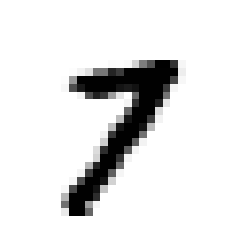

In [7]:
some_digit = train_data[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(train_labels))
print('Class distribution: %s' % np.bincount(train_labels))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [9]:
#Save datas as csv files

#np.savetxt(fname='train_images.csv', X=train_data, delimiter=',', fmt='%d')
#np.savetxt(fname='train_labels.csv', X=train_labels, delimiter=',', fmt='%d')

#np.savetxt(fname='test_images.csv', X=test_data, delimiter=',', fmt='%d')
#np.savetxt(fname='test_labels.csv', X=test_labels, delimiter=',', fmt='%d')

## Preparation of the dataset

In [10]:
#Reshape dataset to have a single color channel

#train_data=train_data.reshape((train_data.shape[0],28,28,1))
#test_data=test_data.reshape((test_data.shape[0],28,28,1))

In [11]:
#One hot encode target values

#def onehot_labels(labels):
#    return np.eye(10)[labels]


#y_train=onehot_labels(train_labels)
#y_test=onehot_labels(test_labels)

In [12]:
y_train=train_labels
y_test=test_labels

In [13]:
# Normalize the pixel values

def prep_pix(train, test):
    train_norm = train.astype('float32') # convert from integers to floats
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0 # normalize to range 0-1
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [14]:
X_train,X_test=prep_pix(train_data,test_data)
X_train.shape

(60000, 784)

## Select and train models

In [16]:
# Data standardization
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)

##### SVM Classifier, Decision Tree Classifier, SGD Classifier,  Logistic Regression Classifier and Random Forrests Classifier

In [17]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

svm_clf = SVC(random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
sgd_clf = SGDClassifier(max_iter=15, tol=-np.infty,loss='hinge', random_state=42)
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rf_clf = RandomForestClassifier(n_estimators=20, random_state=42)

In [18]:
vot_h_clf = VotingClassifier(
    estimators=[('svc',svm_clf),('dt',tree_clf),('lr', log_clf),('rf', rf_clf)],
    voting='hard')

In [19]:
from sklearn.metrics import accuracy_score

for clf in (svm_clf,tree_clf, sgd_clf, log_clf, rf_clf, vot_h_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9792
DecisionTreeClassifier 0.8663
SGDClassifier 0.9125
LogisticRegression 0.9202
RandomForestClassifier 0.958
VotingClassifier 0.9626


In [21]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, random_state=42)

vot_s_clf = VotingClassifier(
     estimators=[('svc',svm_clf),('dt',tree_clf),('lr', log_clf),('rf', rf_clf)],
    voting='soft')

vot_s_clf.fit(X_train, y_train)
y_pred = vot_s_clf.predict(X_test)

print(vot_s_clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.9668


#### Bagging Classifier, Random Forrests Classifier and Extra Trees Classifier

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=10, random_state=42), n_estimators=500,
    max_samples=150, bootstrap=True, n_jobs=-1, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=20, random_state=42)

extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)

estimators = [bag_clf, rf_clf, extra_trees_clf]

for clf in estimators:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.8593
RandomForestClassifier 0.958
ExtraTreesClassifier 0.9501


#### Multi-layer Perceptron Classifier and AdaBoost Classifier

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


mlp_clf = MLPClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

estimators = [mlp_clf, ada_clf]

for clf in estimators:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

MLPClassifier 0.9786
AdaBoostClassifier 0.9646


#### XGBoost Classifier

In [16]:
from xgboost import XGBClassifier

xgb_clf=XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

from sklearn.metrics import accuracy_score

print(xgb_clf.__class__.__name__, accuracy_score(y_test, y_pred))

XGBClassifier 0.9656


| Classifiers                    | Accuracy |
|--------------------------------|----------|
| Bagging Classifier             | 0.8593   |
| Decision Tree Classifier       | 0.8663   |
| SGD Classifier                 | 0.9125   |
| Logistic Regression Classifier | 0.9202   |
| Extra Trees Classifier         | 0.9501   |
| Random Forest Classifier       | 0.958    |
| Voting Classifier (hard)       | 0.9626   |
| AdaBoost Classifier            | 0.9646   |
| XGBoost Classifier             | 0.9656   |
| Voting Classifier (soft)       | 0.9668   |
| MLP Classifier                 | 0.9786   |
| SVM Classifier                 | 0.9792   |